####rice leaf DIsease
first we have to allocate GPU
and check the GPU version

In [1]:
!nvidia-smi

Fri May 21 12:09:15 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                  N/A |
| N/A   40C    P8     7W /  75W |      0MiB /  7611MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.2
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:


# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.resnet152V2 import ResNet152V2
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt



In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/rice_leaf_diseases'
valid_path = '/content/drive/MyDrive/test'


In [5]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
import tensorflow
resnet152V2 =tensorflow.keras.applications.ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


234553344/234545216 [==============================] - 2s 0us/step


In [6]:
# don't train existing weights
for layer in resnet152V2.layers:
    layer.trainable = False

In [7]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/rice_leaf_diseases/*')

In [8]:
# our layers - you can add more if you want
x = Flatten()(resnet152V2.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet152V2.input, outputs=prediction)

In [10]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
______________________________________________________________________________________________

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/rice_leaf_diseases',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 135 images belonging to 3 classes.


In [14]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 45 images belonging to 3 classes.


In [15]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
5/5 [==============================] - 85s 12s/step - loss: 2.7488 - accuracy: 0.4123 - val_loss: 1.0475 - val_accuracy: 0.8444
Epoch 2/20
5/5 [==============================] - 7s 1s/step - loss: 1.1215 - accuracy: 0.8578 - val_loss: 1.4577 - val_accuracy: 0.8444
Epoch 3/20
5/5 [==============================] - 7s 1s/step - loss: 1.0586 - accuracy: 0.8481 - val_loss: 0.9244 - val_accuracy: 0.8667
Epoch 4/20
5/5 [==============================] - 7s 1s/step - loss: 0.3857 - accuracy: 0.9261 - val_loss: 0.1490 - val_accuracy: 0.9556
Epoch 5/20
5/5 [==============================] - 7s 1s/step - loss: 0.1321 - accuracy: 0.9869 - val_loss: 0.0073 - val_accuracy: 1.0000
Epoch 6/20
5/5 [==============================] - 7s 1s/step - loss: 0.0134 - accuracy: 0.9945 - val_loss: 0.0704 - val_accuracy: 0.9778
Epoch 7/20
5/5 [==============================] - 7s 1s/step - loss: 0.1358 - accuracy: 0.9715 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 8/20
5/5 [=======================

In [16]:
import matplotlib.pyplot as plt

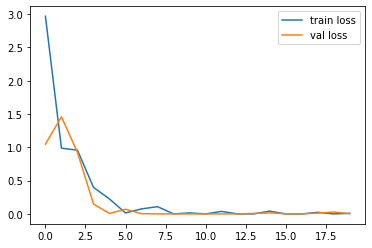

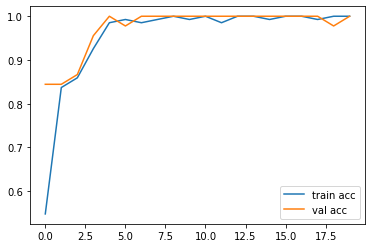

<Figure size 432x288 with 0 Axes>

In [17]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_r.h5')


In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred

array([[1.00000000e+00, 2.54095590e-16, 3.63258012e-31],
       [1.00000000e+00, 1.12739904e-11, 9.80597461e-33],
       [1.60488225e-20, 1.00000000e+00, 1.22604860e-11],
       [1.00000000e+00, 5.06353693e-25, 1.61210798e-38],
       [4.43142728e-34, 1.18973664e-09, 1.00000000e+00],
       [0.00000000e+00, 9.07530787e-18, 1.00000000e+00],
       [0.00000000e+00, 1.31482362e-19, 1.00000000e+00],
       [2.05402370e-34, 9.99999762e-01, 1.94023556e-07],
       [0.00000000e+00, 1.00000000e+00, 1.25287704e-27],
       [1.61450728e-24, 1.53409978e-12, 1.00000000e+00],
       [1.00000000e+00, 9.84110661e-14, 3.59805699e-18],
       [0.00000000e+00, 3.08822897e-15, 1.00000000e+00],
       [0.00000000e+00, 2.37604684e-12, 1.00000000e+00],
       [8.60290170e-01, 1.39709786e-01, 9.26734955e-09],
       [1.00000000e+00, 3.62991867e-17, 1.03166100e-22],
       [1.00000000e+00, 8.88279728e-11, 1.82175177e-18],
       [1.00000000e+00, 1.58498122e-35, 0.00000000e+00],
       [2.02634368e-17, 1.00000

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([1, 1, 1, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 1, 1, 0, 2, 0, 1, 2, 2,
       2, 2, 2, 2, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 2, 1, 2, 1, 0, 2, 0, 1,
       1])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_r.h5')

In [ ]:
img=image.load_img('/content/drive/MyDrive/rice_leaf_diseases/Bacterial leaf blight/DSC_0365.JPG',target_size=(224,224))


SyntaxError: ignored

In [ ]:
x=image.img_to_array(img)
x

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)


array([[0.19232418, 0.01025067, 0.79742515]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a==1

array([ True])

In [ ]:
    preds = model.predict(x)
    preds=np.argmax(preds, axis=1)
    if preds==0:
        preds="The leaf is diseased cotton leaf"
    elif preds==1:
        preds="The leaf is diseased cotton plant"
    elif preds==2:
        preds="The leaf is fresh cotton leaf"
    else:
        preds="The leaf is fresh cotton plant"